# Notebook analyse données extension uwu

Besoin de deux dossiers : sources et exports

In [32]:
import pandas as pd
import os  
import json
import datetime

## DATA

In [42]:
#récupération des données json 

data = []
path = "sources/data_ic05/"
for filename in os.listdir(path):
   with open(os.path.join(path, filename), 'r') as f:
       data.append(json.load(f))

[[{'type': 'session_start', 'unique_key': '55zpmkxxski0', 'survey_id': '005', 'timestamp': 1686737582308}, {'type': 'navigation', 'timestamp': 1686737582308, 'dest_url': 'https://www.utc.fr/', 'trans_quals': ['server_redirect', 'from_address_bar'], 'trans_type': 'typed', 'tab': 1, 'title': 'Université de technologie de Compiègne'}, {'type': 'closed', 'tab': 1, 'timestamp': 1686737593358}, {'type': 'session_end', 'timestamp': 1686737593370}], [{'type': 'session_start', 'unique_key': '5elk10p9afx0', 'survey_id': '005', 'timestamp': 1686817854623}, {'type': 'navigation', 'timestamp': 1686817854623, 'dest_url': 'https://webmail.utc.fr/', 'trans_quals': [], 'trans_type': 'auto_bookmark', 'tab': 226099172, 'title': ''}, {'type': 'click', 'from': 'https://webmail.utc.fr/?_task=mail&_mbox=INBOX', 'url': 'https://webmail.utc.fr/', 'possible_title': '', 'contents': '<a class="btn btn-secondary" id="cas_login_button" href="https://webmail.utc.fr/?_action=caslogin" title="Connexion CAS">Connexion 

In [34]:
#informations globales

cpt = 0
nb_sessions = 0

for session in data :
    for e in session :
        if(e["type"] == "click"):
            cpt +=1 

        if(e["type"] == "navigation"):
            cpt +=1
        
        if(e["type"] == "session_start"):
            nb_sessions +=1
            
            
print("Nombre de clic et navigation : " + str(cpt))
print("Nombre de sessions : "+str(nb_sessions))

Nombre de clic et navigation : 1533
Nombre de sessions : 58


## GRAPHE

Pour Gephi, deux csv : 
noeuds :
- id ("Id")
- nom ("Label")
- title ("Title")

liens : 
- id source ("Source")
- id dest ("Target")
- type ("Type" = "Directed")

In [35]:
noeuds = {} #id : labels
ids_src = []
ids_target = []
types = []

cpt = 0


for session in data :
    for e in session :
        if(e["type"] == "navigation"): 
            if("src_url" in e):

                tab_from = e["src_url"].split("/")
                if(tab_from[0] == "<EXTERNAL>") :
                    site = "<EXTERNAL>"
                else :
                    site = tab_from[2]

                #gestion du titre
                if("title" in e and e["title"] != "") :
                    title = e["title"]
                    if("Webmail" in title) : 
                        title = "Webmail"
                    if("Error" in title) : 
                        title = site
                    if(site == "gitlab.utc.fr") :
                        title = site
                    if("Serge" in title) : 
                        title = "utc_wordpress"

                else : 
                    title = site

                if(not(e["src_url"] in noeuds.keys())): #si la source pas déjà répertoriée
                    noeuds[e["src_url"]] = (cpt, title)
                    cpt +=1
                else : #remplacer si on trouve un titre plus tard
                    if("title" in e and noeuds[e["src_url"]][1] == site) :
                        noeuds[e["src_url"]] = (noeuds[e["src_url"]][0], title)

                #test si url destination déjà répertoriée
                if(not(e["dest_url"] in noeuds.keys())):
                    noeuds[e["dest_url"]] = (cpt, title)
                    cpt +=1
                else :
                    if("title" in e and noeuds[e["src_url"]][1] == site) :
                        noeuds[e["src_url"]] = (noeuds[e["src_url"]][0], title)
                
                #ajout des liens
                id_src = noeuds[e["src_url"]][0]
                id_dest = noeuds[e["dest_url"]][0]
                ids_src.append(id_src)
                ids_target.append(id_dest)
                types.append("Directed")


{'https://webmail.utc.fr/': (0, 'Authentification UTC - CAS – Central Authentication Service'), 'https://cas.utc.fr/cas/login': (1, 'Authentification UTC - CAS – Central Authentication Service'), 'https://webmail.utc.fr/skins/UTC/watermark.html': (2, 'Plateforme pédagogique'), 'https://moodle.utc.fr/': (3, 'Plateforme pédagogique'), 'https://moodle.utc.fr/login/index.php': (4, 'Plateforme pédagogique: Se connecter sur le site'), 'https://moodle.utc.fr/course/view.php': (5, 'Cours\xa0: SY09 - Science des données'), 'https://idp.utc.fr/idp/profile/SAML2/POST/SSO': (6, 'Informations Transmises'), 'https://webapplis.utc.fr/ent/;jsessionid=nLRaRrY5cDvrIayt69WGr72eC8LGLbEp7aF-5ASf.jserv-ent': (7, 'Ent - UTC'), 'https://webapplis.utc.fr/ent/index.jsf': (8, "Service Web d'Authentification - Loading Session Information"), 'https://idp.utc.fr/idp/profile/SAML2/Redirect/SSO': (9, "Service Web d'Authentification - Loading Session Information"), 'https://demeter.utc.fr/portal/pls/portal30/ETUDIANTS

In [36]:
#noeuds - création du dataframe
ids = []
titles = []
liste_noeuds = list(noeuds.values())
for e in liste_noeuds :
    id, title = e
    ids.append(id)
    titles.append(title)


labels = list(noeuds.keys())
data = {'Id': ids, 'Label': labels, 'Title' : titles}

df = pd.DataFrame(data = data)
df = df.set_index('Id')


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

In [37]:
df

,Label,Title
Id,,
0,https://webmail.utc.fr/,Authentification UTC - CAS – Central Authentic...
1,https://cas.utc.fr/cas/login,Authentification UTC - CAS – Central Authentic...
2,https://webmail.utc.fr/skins/UTC/watermark.html,Plateforme pédagogique
3,https://moodle.utc.fr/,Plateforme pédagogique
4,https://moodle.utc.fr/login/index.php,Plateforme pédagogique: Se connecter sur le site
...,...,...
226,https://webapplis.utc.fr/ent/index.jsf;jsessio...,Ent - UTC
227,https://bibliotheque.utc.fr/search.aspx,Recherche - BUTC
228,https://nouveau-europresse-com.ezproxy.utc.fr/...,Europresse


In [38]:
#liens - création du dataframe
data = {'Source': ids_src, 'Target': ids_target, "Type":types}
df2 = pd.DataFrame(data = data)
df2 = df2.set_index('Source')

In [39]:
df2

,Target,Type
Source,,
0,1,Directed
1,0,Directed
2,3,Directed
3,4,Directed
4,3,Directed
...,...,...
227,228,Directed
228,229,Directed
229,229,Directed


In [40]:
#exports en fichier csv

os.makedirs('exports/', exist_ok=True)  
df.to_csv('exports/nodes.csv')  
df2.to_csv('exports/links.csv')  

## HISTOGRAMME JOURS

In [43]:
dico = {
    "webapplis.utc.fr": {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0},
    "assos.utc.fr" : {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0},
    "moodle.utc.fr" : {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0},
    "webmail.utc.fr" : {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0},
}

has_moodle = False
has_ent = False
has_webmail = False
has_asso = False

ent = "webapplis.utc.fr"
asso = "assos.utc.fr"
moodle = "moodle.utc.fr"
webmail = "webmail.utc.fr"


for session in data :
    for e in session :
        if(e["type"] == "session_start"):
            has_moodle = False
            has_ent = False
            has_webmail = False
            has_asso = False

        if(e["type"] == "navigation"):
            
            if("src_url" in e):

                #gesiton temps
                milliSeconds = int(e["timestamp"]) % 1000
                timestamp = int(e["timestamp"]) / 1000
                timestap = datetime.datetime.fromtimestamp(timestamp)
                jour = timestap.weekday()

                tab_from = e["src_url"].split("/")
                if(tab_from[0] == "<EXTERNAL>") :
                    site = "<EXTERNAL>"
                else :
                    site = tab_from[2]

                #moodle
                if(site == moodle and has_moodle == False) :
                    has_moodle = True
                    dico[moodle][jour] += 1
                
                #assos
                if(site == asso and has_asso == False) :
                    has_asso = True
                    dico[asso][jour] += 1
                
                #ent
                if(site == ent and has_ent == False) :
                    has_ent = True
                    dico[ent][jour] += 1
                
                #webmail
                if(site == webmail and has_webmail == False) :
                    has_webmail = True
                    dico[webmail][jour] += 1
            

{'webapplis.utc.fr': {0: 0, 1: 4, 2: 3, 3: 2, 4: 2, 5: 0, 6: 3}, 'assos.utc.fr': {0: 0, 1: 0, 2: 0, 3: 0, 4: 2, 5: 0, 6: 1}, 'moodle.utc.fr': {0: 1, 1: 2, 2: 6, 3: 7, 4: 3, 5: 2, 6: 3}, 'webmail.utc.fr': {0: 0, 1: 3, 2: 6, 3: 5, 4: 4, 5: 4, 6: 5}}


7


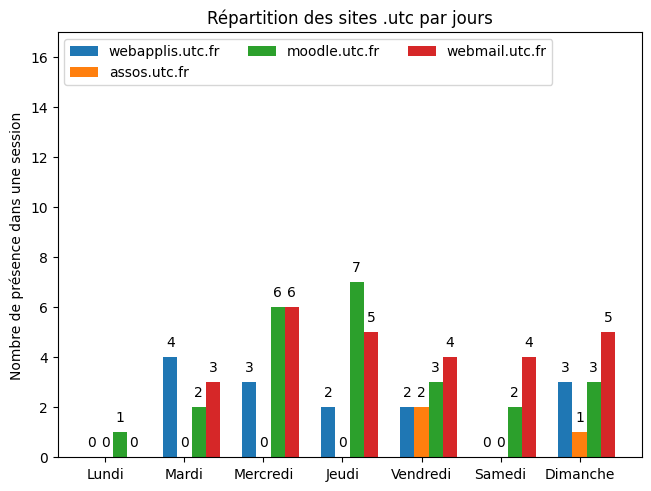

In [44]:
import matplotlib.pyplot as plt
import numpy as np

species = ["Lundi", "Mardi", "Mercredi", "Jeudi", "Vendredi", "Samedi", "Dimanche"]
penguin_means = {
    "webapplis.utc.fr": dico["webapplis.utc.fr"].values(),
    "assos.utc.fr" : dico["assos.utc.fr"].values(),
    "moodle.utc.fr" : dico["moodle.utc.fr"].values(),
    "webmail.utc.fr" : dico["webmail.utc.fr"].values(),
}

maximum = 0
for site in penguin_means.keys() :
    liste = list(penguin_means[site])
    temp = max(liste)
    if(temp > maximum):
        maximum = temp
print(maximum)

x = np.arange(len(species))  # the label locations
width = 0.18  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=6)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Nombre de présence dans une session')
ax.set_title('Répartition des sites .utc par jours')
ax.set_xticks(x + width, species)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, maximum+10)

plt.show()

## MOYENNES TEMPS SESSIONS

In [65]:
jours = {0:"Lundi", 1:"Mardi", 2:"Mercredi", 3:"Jeudi", 4:"Vendredi", 5:"Samedi", 6:'Dimanche'}
dico_temps = {
    "Lundi": [],
    "Mardi" : [],
    "Mercredi" : [],
    "Jeudi" : [],
    "Vendredi" : [],
    "Samedi" : [],
    "Dimanche" : [],
}

tab_jours = []
tab_temps = []

temps_totaux = []

temps_max = 350 #valeurs max - pour enlever valeurs abérantes

for session in data :
    for e in session :
        if(e["type"] == "session_start"):
            unique_key = ""
            if("timestamp" in e) :
                #gesiton temps
                unique_key = e["unique_key"]
                milliSeconds = int(e["timestamp"]) % 1000
                timestamp = int(e["timestamp"]) / 1000
                datetime_start = datetime.datetime.fromtimestamp(timestamp)
                jour = datetime_start.weekday()
        
        if(e["type"] == "session_end"):
            #gestion temps
            if("timestamp" in e) :
                milliSeconds = int(e["timestamp"]) % 1000
                timestamp = int(e["timestamp"]) / 1000
                datetime_end = datetime.datetime.fromtimestamp(timestamp)
                jour_end = datetime_start.weekday()
                if(jour != jour_end) :
                    print("session plus d'une journée")
                minutes_diff = (datetime_end - datetime_start).total_seconds() / 60.0
                if(minutes_diff > 0 and minutes_diff < temps_max) :
                    dico_temps[jours[jour_end]].append(minutes_diff)
                    temps_totaux.append(minutes_diff)
                    tab_jours.append(jours[jour_end])
                    tab_temps.append(minutes_diff)
                    

{'Lundi': [4.6120833333333335, 0.11888333333333333], 'Mardi': [34.02101666666667, 25.375633333333333, 0.020066666666666667, 0.10053333333333334, 0.9812666666666666, 0.10653333333333334, 0.03676666666666666], 'Mercredi': [0.18436666666666665, 23.339366666666667, 123.21653333333333, 26.127149999999997, 10.145983333333334, 2.520766666666667, 9.149866666666666, 0.17493333333333333, 0.5233833333333333, 51.33448333333333, 5.5676, 37.442816666666666, 4.14205, 0.8037833333333333], 'Jeudi': [179.31811666666667, 2.0891666666666664, 110.05205, 255.99668333333332, 13.405183333333333, 103.8502, 152.01385, 82.07068333333333], 'Vendredi': [0.88955, 16.847916666666666, 149.67691666666667, 33.27035, 5.4737833333333334, 2.55585, 24.418133333333333, 2.9065999999999996, 90.7926], 'Samedi': [0.38505, 1.1410833333333334, 59.068549999999995, 0.045733333333333334, 279.47574999999995, 0.36378333333333335], 'Dimanche': [19.775666666666666, 14.895066666666667, 0.20138333333333333, 7.550416666666666, 62.848600000

42.11177484276729


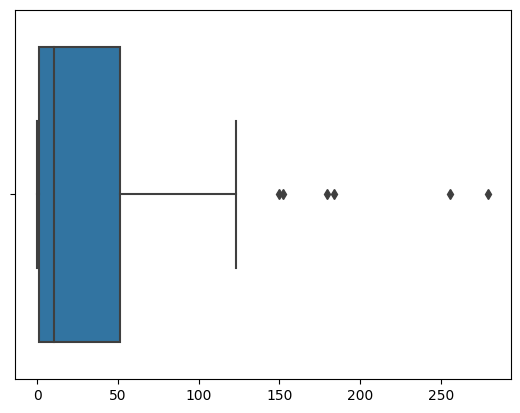

In [66]:
import seaborn as sns

#répartition temps de toutes les sessions
sns.boxplot(x=temps_totaux)


In [67]:
#informations générales sur les temps de session

a = np.array(temps_totaux)
df_describe = pd.DataFrame(a)
df_describe.describe()

,0
count,53.000000
mean,42.111775
std,66.811870
min,0.020067
25%,0.889550
50%,10.145983
75%,51.334483
max,279.475750


       Lundi      Mardi    Mercredi       Jeudi    Vendredi      Samedi   
0   4.612083  34.021017    0.184367  179.318117    0.889550    0.385050  \
1   0.118883  25.375633   23.339367    2.089167   16.847917    1.141083   
2        NaN   0.020067  123.216533  110.052050  149.676917   59.068550   
3        NaN   0.100533   26.127150  255.996683   33.270350    0.045733   
4        NaN   0.981267   10.145983   13.405183    5.473783  279.475750   
5        NaN   0.106533    2.520767  103.850200    2.555850    0.363783   
6        NaN   0.036767    9.149867  152.013850   24.418133         NaN   
7        NaN        NaN    0.174933   82.070683    2.906600         NaN   
8        NaN        NaN    0.523383         NaN   90.792600         NaN   
9        NaN        NaN   51.334483         NaN         NaN         NaN   
10       NaN        NaN    5.567600         NaN         NaN         NaN   
11       NaN        NaN   37.442817         NaN         NaN         NaN   
12       NaN        NaN  

<Axes: xlabel='Jours', ylabel='Temps'>

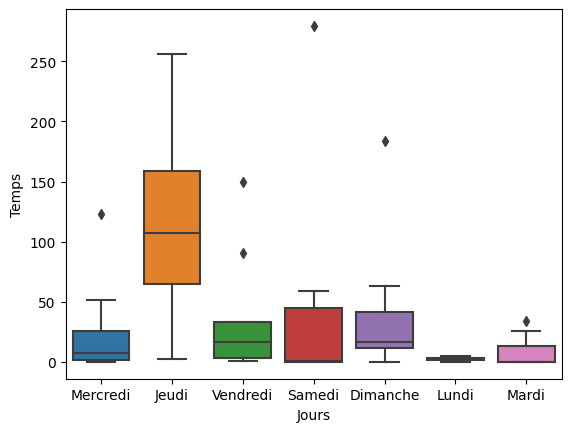

In [69]:
import seaborn as sns

#répartition des temps de sessions par jours
df_temps2 = pd.DataFrame.from_dict(dico_temps, orient='index').T

data_temps = {'Jours': tab_jours, 'Temps': tab_temps}

df_temps = pd.DataFrame(data = data_temps)


sns.boxplot(
    x=df_temps["Jours"],
    y=df_temps["Temps"],
    data=df_temps
)



## SANKEY DIAGRAM

Pour avoir les fichiers pour le diagram de Sankey :
- noeuds : prendre le fichier par défaut (ne garder que l'id et le titre - renommer en "Name")
- liens : récupérer le fichier de sorti de Gephi pour avoir les poids et ne garder que trois colonnes : Source, Target, Value

In [61]:
nodes = pd.read_csv("nodes_simple.csv")
links = pd.read_csv("liens_gephi.csv")

In [62]:
#on ne garde que les liens principaux

max_links = 4
links = links[links.Value >= max_links]

In [64]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 10,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = list(nodes["Name"]),
    ),
    link = dict(
      arrowlen=10,
      source = list(links["Source"]), # indices correspond to labels, eg A1, A2, A1, B1, ...
      target = list(links["Target"]),
      value = list(links["Value"]),
      label = list(links["Value"])
  ))])

fig.update_layout(title_text="Sankey Diagram - Parcours utilisateur utc.fr", font_size=10)
fig.show()